<a href="https://colab.research.google.com/github/Aditya-Sharma-Aiml/Machine-Learning/blob/main/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

first we import all the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


then we load our data

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Check for null values

In [ ]:
df.isnull().sum().sum()
# x = df
x = df[["Annual Income (k$)","Spending Score (1-100)"]]

Drop the unwanted column

In [ ]:
df = df.drop('CustomerID', axis=1)


Data preprocessing(Encoding)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


Train the model(KMeans)

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5,random_state=0)
k_means.fit(x)

KMeans(n_clusters=5, random_state=0)

In [ ]:
df["Cluster"] = k_means.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


In [ ]:
df.shape

(200, 5)

In [ ]:
df["Annual Income (k$)"]

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17
...,...
195,120
196,126
197,126
198,137


In [ ]:
k_means.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

plot a scatter plot

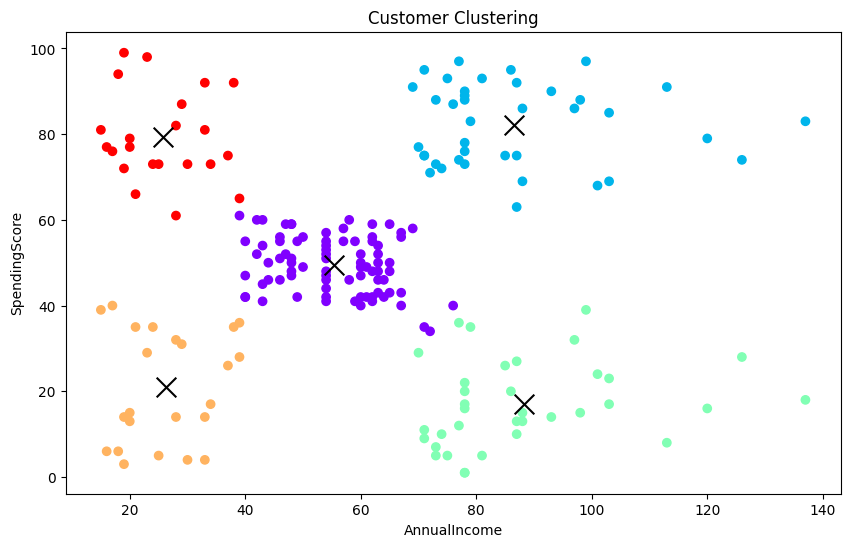

In [ ]:
plt.figure(figsize=(10,6))
# sns.scatterplot(x="Annual_income",y="Spending_Score",hue="Cluster",data=df)
plt.scatter(df['Annual Income (k$)'],df["Spending Score (1-100)"],c=df["Cluster"],cmap="rainbow")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],color="black",marker="x",s=200)
plt.xlabel("AnnualIncome")
plt.ylabel("SpendingScore")
plt.title("Customer Clustering")
plt.show()


Choose the new point

In [ ]:
from types import new_class
new_point = np.array([[15,39]]) #1	19	15	39
new_point_cluster = k_means.predict(new_point)
print(f"The new point {new_point[0]} issigned to cluster{new_point_cluster}")

The new point [15 39] issigned to cluster[3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Plot the scatterplot(with centriod and new datapoint)

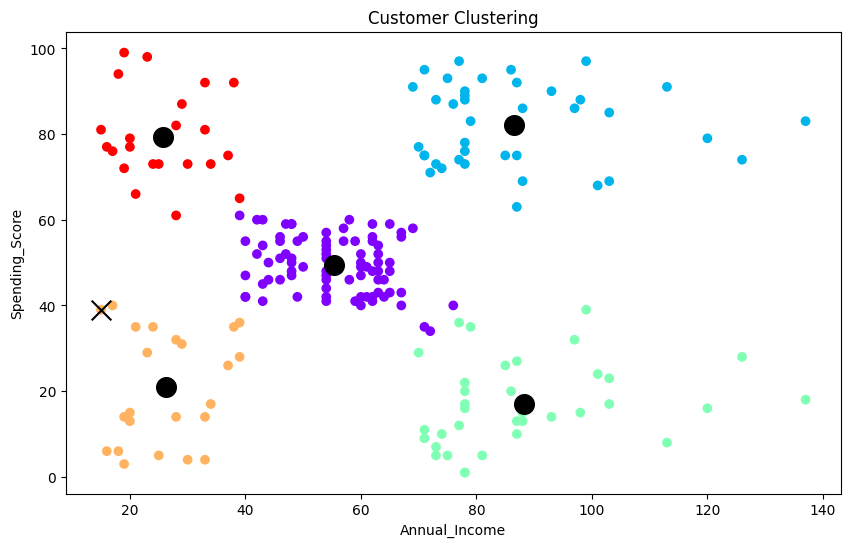

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'],df["Spending Score (1-100)"],c=df["Cluster"],cmap="rainbow")
plt.scatter(new_point[0][0],new_point[0][1],color='black',marker='x',s=200)
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],color='black',marker='o',s=200)
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.title('Customer Clustering')
plt.show()